<a href="https://colab.research.google.com/github/icampuzanov/SIS420-2_2023/blob/main/Primer_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerias
import numpy as np
from matplotlib import pyplot
import pandas as pd
from sklearn.model_selection import train_test_split
import random as r

In [2]:
#Cargar dataset
data = pd.read_csv('telecom_churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [3]:
#Separar valores de x y y (Columna y: Churn)
x = data.iloc[:, 1:11]
y = data.iloc[:, 0]

#Convertir a numpy
x = x.to_numpy()
y = y.to_numpy()
print(x)

[[128.     1.     1.   ...  89.     9.87  10.  ]
 [107.     1.     1.   ...  82.     9.78  13.7 ]
 [137.     1.     0.   ...  52.     6.06  12.2 ]
 ...
 [ 28.     1.     0.   ...  56.    14.44  14.1 ]
 [184.     0.     0.   ...  50.     7.98   5.  ]
 [ 74.     1.     1.   ... 100.    13.3   13.7 ]]


In [4]:
#Generar set de entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape

((2666, 10), (667, 10))

In [5]:
#Función para normalizar valores de x
def featureNormalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [6]:
#Normalizar valores de x
x, mu, sigma = featureNormalize(x_train)
print(x)

[[-0.53653983  0.32096771 -0.61753312 ... -0.98466088 -0.22556232
   0.56515672]
 [-0.21178045 -3.11557817  1.61934635 ...  1.76858332 -0.06386798
  -0.99199559]
 [ 0.33781235  0.32096771 -0.61753312 ... -0.49843674 -0.51345712
  -3.70795892]
 ...
 [-0.6364658   0.32096771  1.61934635 ...  1.88406155 -0.60021994
   0.34787965]
 [ 0.88740516  0.32096771  1.61934635 ...  0.76574603 -0.48585077
  -0.52122861]
 [-0.98620667  0.32096771 -0.61753312 ... -2.13944321 -0.98276509
  -0.15910017]]


In [7]:
#Función de activación sigmoid
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [8]:
#Agregar columna de 1s
m, n = x.shape
x = np.concatenate([np.ones((m, 1)), x], axis=1)
print(x)

[[ 1.         -0.53653983  0.32096771 ... -0.98466088 -0.22556232
   0.56515672]
 [ 1.         -0.21178045 -3.11557817 ...  1.76858332 -0.06386798
  -0.99199559]
 [ 1.          0.33781235  0.32096771 ... -0.49843674 -0.51345712
  -3.70795892]
 ...
 [ 1.         -0.6364658   0.32096771 ...  1.88406155 -0.60021994
   0.34787965]
 [ 1.          0.88740516  0.32096771 ...  0.76574603 -0.48585077
  -0.52122861]
 [ 1.         -0.98620667  0.32096771 ... -2.13944321 -0.98276509
  -0.15910017]]


In [9]:
#Función de costo
def calcularCosto(theta, X, y):
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [10]:
#Función de descenso por el gradiente
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [11]:
#Funcion para generar predicciones
def predict(theta, X):
    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [12]:
#Generar pesos iniciales
theta = np.zeros(10)

Text(0, 0.5, 'Costo')

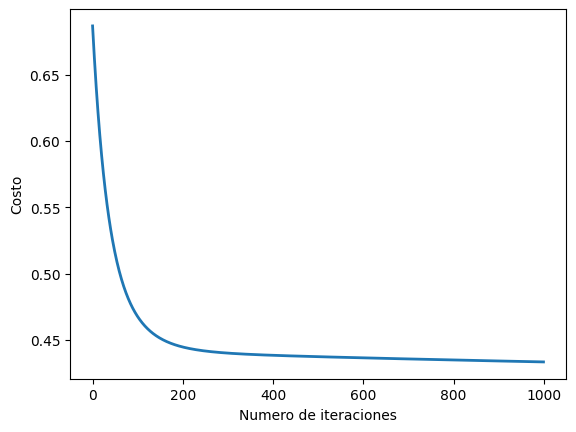

In [13]:
#Learning rate y numero de interaciones
alpha = 0.000001
num_iters = 1000

#Entrenamiento del modelo con set de entrenamiento
theta, J_history = descensoGradiente(theta, x_train, y_train, alpha, num_iters)

#Graficación de los resultados
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo')

In [14]:
#Calculo de la precision de los pesos
p_train = predict(theta, x_train)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p_train == y_train) * 100))
p_test = predict(theta, x_test)
print('Precisión de prueba: {:.2f} %'.format(np.mean(p_test == y_test) * 100))

Precisión de entrenamiento: 85.71 %
Precisión de prueba: 84.71 %


In [15]:
#Prediccion de valores de prueba individuales
i = r.randint(0, len(x_test))
test_vals = x_test[i]
test_label = y_test[i]
test_vals = (test_vals - mu) / sigma
pred = predict(theta, test_vals)
print(f"Valor real: {test_label}")
print(f"Valor predicho: {pred}")

Valor real: 0
Valor predicho: 1.0
